In [6]:
import json
import pandas as pd

# Load data from data.json (already done in the notebook, but I'll include it for completeness)
with open('data.json', encoding='utf-8') as f:
    data = json.load(f)
df = pd.DataFrame(data['snapshots'][0]['offers'])

# Group by seller_name and count offers
seller_counts = df.groupby('seller_name').size().reset_index(name='offer_count')

# Filter sellers with more than 10 offers
filtered_sellers = seller_counts[seller_counts['offer_count'] > 10]['seller_name']

# Filter the original DataFrame to include only offers from the filtered sellers
filtered_df = df[df['seller_name'].isin(filtered_sellers)]

# Convert the filtered DataFrame to a list of dictionaries (JSON format)
filtered_offers_list = filtered_df.to_dict(orient='records')

# Save the filtered offers to a new JSON file
with open('filtered_offers.json', 'w', encoding='utf-8') as f:
    json.dump(filtered_offers_list, f, indent=2, ensure_ascii=False)

In [13]:

import pandas as pd
df = pd.DataFrame(data[0])

ValueError: If using all scalar values, you must pass an index

In [8]:
with open('filtered_offers.json', encoding='utf-8') as f:
    data = json.load(f)

In [4]:
df.sort_values(by='price')

,title,link,price,seller_link,seller_name,seller_image_url
311,👾【ТИТАН| 5900 ММР | РЕЙТИНГ】🌈【ПОРЯДА: 10000】...,https://funpay.com/lots/offer?id=43193593,990.216356,https://funpay.com/users/14562943/,deust77,https://sfunpay.com/s/avatar/zm/p5/zmp52m78zza...
59,⚔️💎6864 !ЛП 4! 💎⚔️ Откалиброван 💠РОДНАЯ ПОЧТА💠...,https://funpay.com/lots/offer?id=53393657,1036.252546,https://funpay.com/users/3143137/,Fsigroman,https://sfunpay.com/s/avatar/g9/vi/g9vi1c4mxss...
296,💜💦6133 MMR 💜 ТИТАН 💜 ОТКАЛИБРОВАН 💜ПОРЯДОЧНОСТ...,https://funpay.com/lots/offer?id=52739804,1050.916497,https://funpay.com/users/517098/,leesle77777,https://sfunpay.com/s/avatar/3g/11/3g11bf8k54y...
60,⚔️💎7400 !лп2шт! 💎⚔️ Откалиброван 💠РОДНАЯ ПОЧТА...,https://funpay.com/lots/offer?id=53229412,1075.356415,https://funpay.com/users/3143137/,Fsigroman,https://sfunpay.com/s/avatar/g9/vi/g9vi1c4mxss...
15,"🧿【 ТИТАН | 6000 MMR 】🔹【 10,400 ПОРЯДОЧНОСТЬ 】📬...",https://funpay.com/lots/offer?id=43918702,1085.310203,https://funpay.com/users/2626064/,Soufiw,https://sfunpay.com/s/avatar/ze/to/zetort92vbr...
...,...,...,...,...,...,...
369,✅❗TOP 200 EUROPE┃15000 MMR ✅❗АККАУНТ ДЕЙСТВУЮЩ...,https://funpay.com/lots/offer?id=34114978,289999.006925,https://funpay.com/users/3541209/,PirsRust,https://sfunpay.com/s/avatar/ny/z2/nyz297llgwd...
17,"💖All Arcana: VOID, RAZOR, DROW, SPECTRE, QUEEN...",https://funpay.com/lots/offer?id=25410563,310088.629313,https://funpay.com/users/6003977/,KhanTran2212,https://sfunpay.com/s/avatar/h7/mv/h7mv28zmny4...
188,"⚫️🔴 TOP 100 EU┃15100 MMR ✅ ┃ 🔴⚫️, Продажа, 151...",https://funpay.com/lots/offer?id=13832494,366598.778004,https://funpay.com/users/1291022/,ClearSky4You,https://sfunpay.com/s/avatar/rj/d4/rjd4l3swpmo...
294,"9730 mmr,drow ranger,spectre,wr,qop,wk,void,ra...",https://funpay.com/lots/offer?id=22116986,366598.778004,https://funpay.com/users/3140450/,Levin729,https://sfunpay.com/s/avatar/fn/4s/fn4s3lbn6lg...


<Axes: xlabel='seller_name', ylabel='price'>

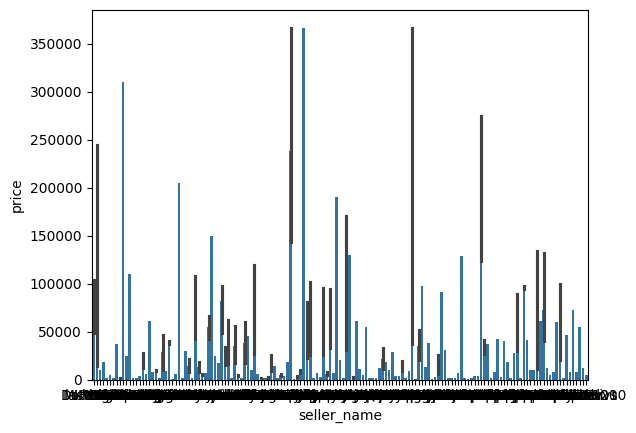

In [5]:
import seaborn as sns
sns.barplot(df, x='seller_name', y='price')